<span style="color:Yellow;"><font size="10"><b>🍋Lemon Quality Classification</b></font></span>

<font size="6"><b>Importing Libraries</b></font>

In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
import PIL
from fastai.vision.all import *
from fastai.vision.widgets import *

In [2]:
from fastai.vision.widgets import *

In [3]:
path=Path("../input/lemon-quality-dataset/lemon_dataset")
path.ls()

(#4) [Path('../input/lemon-quality-dataset/lemon_dataset/empty_background'),Path('../input/lemon-quality-dataset/lemon_dataset/good_quality'),Path('../input/lemon-quality-dataset/lemon_dataset/bad_quality'),Path('../input/lemon-quality-dataset/lemon_dataset/.git')]

In [6]:
def get_y(x):return str(x.parent)[45:]
dblock=DataBlock(
            blocks=(ImageBlock,CategoryBlock),
            get_items=get_image_files,
            get_y=get_y,
            item_tfms=Resize(460)
)
dblock.summary(path)

Setting-up type transforms pipelines
Found 2528 items
2 datasets of sizes 2023,505
Setting up Pipeline: PILBase.create
Setting up Pipeline: get_y -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      ../input/lemon-quality-dataset/lemon_dataset/empty_background/empty_background_367.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=300x300
  Pipeline: get_y -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      ../input/lemon-quality-dataset/lemon_dataset/empty_background/empty_background_367.jpg
    applying get_y gives
      empty_background
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(1)

Final sample: (PILImage mode=RGB size=300x300, TensorCategory(1))


Found 2528 items
2 datasets of sizes 2023,505
Setting up Pipeline: PILBase.create
Setting up Pipeline: get_y -> Categorize -- {'vocab': None, 'sor

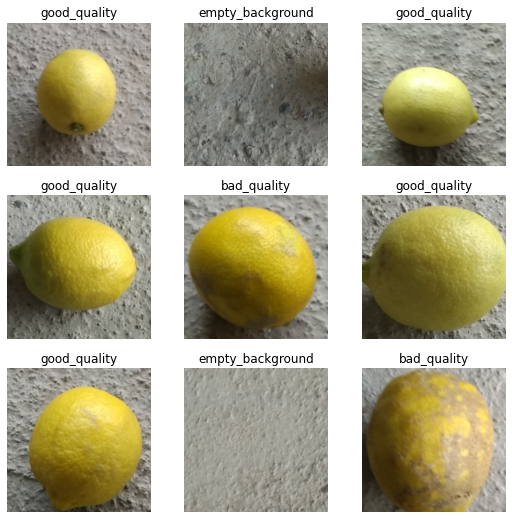

In [7]:
dls=dblock.dataloaders(path)
dls.show_batch()

In [ ]:
learn=vision_learner(dls,resnet34)
learn.fine_tune(6)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,time


In [ ]:
learn.predict(sample[2001])[0]